22회

금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았다. 분산에 대해 검정을 수행하시오. (유의확률 0.05)

1 연구가설과 귀무가설 작성

2 양측 검정 시행

3 검정통계량, 가설채택

In [2]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/content.csv')
df.head()

,content
0,97.995295
1,101.478315
2,102.284913
3,98.993634
4,104.635232


In [ ]:
import numpy as np
from scipy import stats

def chi_var_test(x, var0, alternative='two-sided'):
    lenth = len(x)
    chi_stat = (lenth-1) * np.var(x, ddof=1) / var0
    
    temp = stats.chi2.cdf(chi_stat, lenth-1)
    if alternative == 'two-sided':
        pval = 2*(1-temp) if temp > 0.5 else 2*temp
    elif alternative == 'greater':
        pval = 1 - temp
    elif alternative == 'less':
        pval = temp
    else:
        print("ERROR")
        
    return chi_stat, pval


# 1. 귀무가설 : 분산은 1.3이다. / 연구가설 : 분산은 1.3이 아니다

# 2. 양측 검정 시행
chi_stat, p_val = chi_var_test(df['content'], var0=1.3, alternative='two-sided')
print('p-value ',p_val)
print('statics ',chi_stat)

# 3. 검정통계량
# p-value는 4.2e-8로 유의수준 0.05수준에서 귀무가설을 기각하고 연구가설을 채택한다.

22회

Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)

1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

2 관리도 시각화

In [3]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/error.csv')
df.head()

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5


cl :  1.705 ucl :  6.6792290403091155 lcl :  -3.2692290403091153


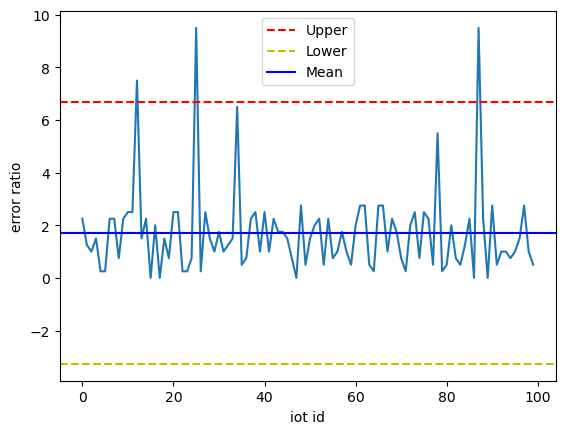

In [4]:
# 1. 3시그마를 기준으로 상한 하한선을 선정

df['error_case_number'] = df['error_case_number']/200*100

mean =df['error_case_number'].mean()
ucl = mean + df['error_case_number'].std()*3
lcl = mean - df['error_case_number'].std()*3

print('cl : ',mean,'ucl : ',ucl,'lcl : ',lcl)


# 2. 관리도 시각화

import matplotlib.pyplot as plt
plt.plot(df['error_case_number'])
plt.axhline(y=ucl, color='r', linestyle='--',label='Upper')
plt.axhline(y=lcl, color='y', linestyle='--',label='Lower')
plt.axhline(y=mean, color='b',label="Mean")
plt.legend()
plt.ylabel('error ratio')
plt.xlabel('iot id')
plt.show()

In [5]:
mean

1.705